<a href="https://colab.research.google.com/github/killian31/Paint_recognition/blob/main/Paintings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Painter Recognition Project

Copyright : Killian Steunou

Linkedin : https://www.linkedin.com/in/killian-steunou/

Github : https://github.com/killian31

In this notebook we will train a model able to recognize the painter of a painting, just for Dali, Monnet and Van Gogh for now.

In order to load the data like I did using Google Drive, you need to download the datasets here : https://github.com/killian31/Paint_recognition/raw/main/datasets.zip , unzip the file and import the folder in your Google Drive.

# 1. Import the data

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
#Import dataset
import pathlib
import os

data_dir = pathlib.Path('/content/drive/MyDrive/Colab_Notebooks/Paintings')

# To use the folder in your Google Drive, replace this with '/content/drive/MyDrive/name_of_your_folder'

print(data_dir)
print(os.path.abspath(data_dir))

/content/drive/MyDrive/Colab_Notebooks/Paintings
/content/drive/MyDrive/Colab_Notebooks/Paintings


In [10]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

514


In [18]:
batch_size = 3
img_height = 100
img_width = 100

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 514 files belonging to 3 classes.
Using 412 files for training.
Found 514 files belonging to 3 classes.
Using 102 files for validation.
['Dali', 'Monnet', 'Van_Gogh']


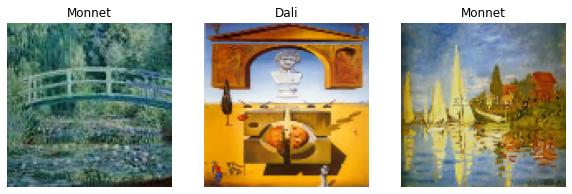

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# 2. Design the model

We use callbacks to stop the training when an accuracy of 90% has been reached.

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [14]:
callbacks = myCallback()

The training sould take 15 minutes with 30 epochs, 30 minutes with 60 epochs.

In [15]:
from tensorflow.keras import layers

num_classes = 3

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

model.fit( 
  train_data,
  validation_data=val_data,
  epochs=60,
  callbacks=[callbacks]
)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


138/138 [==============================] - 193s 1s/step - loss: 1.1018 - accuracy: 0.3495 - val_loss: 1.0942 - val_accuracy: 0.4020
Epoch 2/60
138/138 [==============================] - 30s 217ms/step - loss: 1.0988 - accuracy: 0.3786 - val_loss: 1.0903 - val_accuracy: 0.4020
Epoch 3/60
138/138 [==============================] - 30s 217ms/step - loss: 1.0993 - accuracy: 0.3786 - val_loss: 1.0885 - val_accuracy: 0.4020
Epoch 4/60
138/138 [==============================] - 30s 220ms/step - loss: 1.1096 - accuracy: 0.3981 - val_loss: 1.0864 - val_accuracy: 0.4020
Epoch 5/60
138/138 [==============================] - 31s 222ms/step - loss: 1.0921 - accuracy: 0.4005 - val_loss: 1.0869 - val_accuracy: 0.4020
Epoch 6/60
138/138 [==============================] - 31s 221ms/step - loss: 1.0952 - accuracy: 0.4272 - val_loss: 1.0285 - val_accuracy: 0.5196
Epoch 7/60
138/138 [==============================] - 31s 221ms/step - loss: 1.0188 - accuracy: 0.4951 - val_loss: 1.0332 - val_accuracy: 0.470

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 97, 97, 128)       6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 32)        32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0

# 3. Testing the model

Saving Van-Gogh194.jpeg to Van-Gogh194.jpeg


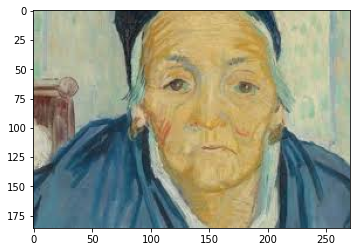

I think this is Van Gogh with a precision of 60.32%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
import cv2
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(100,100)), axis=0) 
    res = model.predict_classes(img_to_predict)
    #print(res)
    #print(model.predict(img_to_predict))
    if res == 0:
        print(f"I think this is Dali with a precision of {round(float(model.predict(img_to_predict)[0,res]*100), 2)}%")
    elif res == 1 :
        print(f"I think this is Monnet with a precision of {round(float(model.predict(img_to_predict)[0,res]*100), 2)}%")
    elif res == 2 :
        print(f"I think this is Van Gogh with a precision of {round(float(model.predict(img_to_predict)[0,res]*100), 2)}%")